# Pandas 6

Pandas handles timestamps in a special way that makes it easy to work with time series. As this is particularly important for financial applications, this lecture will concentrate on time series processing.

We will look at:

* the datetime object,
* indexing and slicing by time,
* various operations on time series,
* and, time permitting, we'll build a trading simulator.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For time series analysis, we also need another module
from datetime import datetime

## Loading financial time series data

In [3]:
# Data downloaded from Yahoo! Finance
df = pd.read_csv('Pandas_6_data/aapl.csv') 

# Convert the 'Date' column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,325.64,330.26,324.84,329.57,111284600,44.59
2011-01-04,332.44,332.50,328.15,331.29,77270200,44.82
2011-01-05,329.55,334.34,329.50,334.00,63879900,45.18
2011-01-06,334.72,335.25,332.90,333.73,75107200,45.15
2011-01-07,333.99,336.35,331.90,336.12,77982800,45.47


Pandas also provides convenience functions to get data directly from web sources. For this, we need the _pandas-datareader_ module.

We need to install pandas-datareader.

* Typically, just installing it from the GUI works, but there's currently a bug whose fix is in the "dev" version, but not in the version installed by default.

* Install git  (this is a commonly used version control software). Then try
> pip install git+https://github.com/pydata/pandas-datareader.git

OR, try this:
> git clone https://github.com/pydata/pandas-datareader.git

> cd pandas-datareader

> python setup.py install

In [4]:
# Import the module for web downloads
# (You will need to install the package "pandas-datareader")
import pandas_datareader.data as web

# Specify start and end dates to download
start_date = datetime(2017, 1, 1) # January 1, 2016
end_date = datetime(2019, 1, 1)   # January 1, 2018

# Get Tesla stock from the Investors Exchange (IEX) for these dates
df = web.DataReader('TSLA', 'yahoo', start_date, end_date)
df.index = pd.to_datetime(df.index)

df[:5]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995
2017-01-09,231.919998,228.000000,228.970001,231.279999,3957000,231.279999


Note that this DataFrame has a special kind of index.

In [5]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=502, freq=None)

In [6]:
sixth_date = df.index[5]
sixth_date

Timestamp('2017-01-10 00:00:00')

In [7]:
# We can extract year, month, etc.
print sixth_date, 'corresponds to'
print 'year', sixth_date.year
print 'month', sixth_date.month
print 'day', sixth_date.day
print 'day of the week', sixth_date.dayofweek  # Monday=0, ..., Sunday=6
print 'quarter', sixth_date.quarter

2017-01-10 00:00:00 corresponds to
year 2017
month 1
day 10
day of the week 1
quarter 1


## Indexing in TimeSeries

We can index into this DataFrame using such Timestamp objects.

In [8]:
df.loc[sixth_date]

High         2.320000e+02
Low          2.268900e+02
Open         2.320000e+02
Close        2.298700e+02
Volume       3.660000e+06
Adj Close    2.298700e+02
Name: 2017-01-10 00:00:00, dtype: float64

In [9]:
df.loc['1/10/2017']  # month/day/year

High         2.320000e+02
Low          2.268900e+02
Open         2.320000e+02
Close        2.298700e+02
Volume       3.660000e+06
Adj Close    2.298700e+02
Name: 2017-01-10 00:00:00, dtype: float64

In [10]:
df.loc['2017-01-10'] # year-month-day

High         2.320000e+02
Low          2.268900e+02
Open         2.320000e+02
Close        2.298700e+02
Volume       3.660000e+06
Adj Close    2.298700e+02
Name: 2017-01-10 00:00:00, dtype: float64

In [11]:
df.loc[datetime(year=2017, month=1, day=10)]

High         2.320000e+02
Low          2.268900e+02
Open         2.320000e+02
Close        2.298700e+02
Volume       3.660000e+06
Adj Close    2.298700e+02
Name: 2017-01-10 00:00:00, dtype: float64

## Slicing in Time Series

We can also use any of the indexing methods above to select out slices of a time series.

In [12]:
df.loc['1/1/2017':'1/10/2017']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-04,228.000000,214.309998,214.750000,226.990005,11213500,226.990005
2017-01-05,227.479996,221.949997,226.419998,226.750000,5911700,226.750000
2017-01-06,230.309998,225.449997,226.929993,229.009995,5527900,229.009995
2017-01-09,231.919998,228.000000,228.970001,231.279999,3957000,231.279999
2017-01-10,232.000000,226.889999,232.000000,229.869995,3660000,229.869995


In addition, Pandas allows us to easily slice by month or year as well.

In [13]:
closings = df['Close']  # Select one column from our DataFrame; this is a Series
closings['2017-05']

Date
2017-05-01    322.829987
2017-05-02    318.890015
2017-05-03    311.019989
2017-05-04    295.459991
2017-05-05    308.350006
2017-05-08    307.190002
2017-05-09    321.260010
2017-05-10    325.220001
2017-05-11    323.100006
2017-05-12    324.809998
2017-05-15    315.880005
2017-05-16    317.010010
2017-05-17    306.109985
2017-05-18    313.059998
2017-05-19    310.829987
2017-05-22    310.350006
2017-05-23    303.859985
2017-05-24    310.220001
2017-05-25    316.829987
2017-05-26    325.140015
2017-05-30    335.100006
2017-05-31    341.010010
Name: Close, dtype: float64

In [14]:
closings['2017']

Date
2017-01-03    216.990005
2017-01-04    226.990005
2017-01-05    226.750000
2017-01-06    229.009995
2017-01-09    231.279999
2017-01-10    229.869995
2017-01-11    229.729996
2017-01-12    229.589996
2017-01-13    237.750000
2017-01-17    235.580002
2017-01-18    238.360001
2017-01-19    243.759995
2017-01-20    244.729996
2017-01-23    248.919998
2017-01-24    254.610001
2017-01-25    254.470001
2017-01-26    252.509995
2017-01-27    252.949997
2017-01-30    250.630005
2017-01-31    251.929993
2017-02-01    249.240005
2017-02-02    251.550003
2017-02-03    251.330002
2017-02-06    257.769989
2017-02-07    257.480011
2017-02-08    262.079987
2017-02-09    269.200012
2017-02-10    269.230011
2017-02-13    280.600006
2017-02-14    280.980011
                 ...    
2017-11-16    312.500000
2017-11-17    315.049988
2017-11-20    308.739990
2017-11-21    317.809998
2017-11-22    312.600006
2017-11-24    315.549988
2017-11-27    316.809998
2017-11-28    317.549988
2017-11-29    307.54

The general solution to slicing is to create a range of dates and select a slice using that range. There are many options:

* For calendar dates, use *date_range()*, with a common case being:

   > date_range(start_date, end_date, freq)


* The "freq" can be:
    * 'D' for daily
    * 'B' for each business day
    * 'W-MON', 'W-TUE', ... for once a week on Monday, Tuesday, ...
    * 'M' for monthly
    * ...
    * 'WOM-3FRI' for third Friday of the month (usual for option expiry dates)

In [15]:
dates = pd.date_range(start='1/3/2017', end='2/3/2017', freq='W-TUE')
list(dates)

[Timestamp('2017-01-03 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-10 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-17 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-24 00:00:00', freq='W-TUE'),
 Timestamp('2017-01-31 00:00:00', freq='W-TUE')]

In [16]:
df.loc[dates]

,High,Low,Open,Close,Volume,Adj Close
2017-01-03,220.330002,210.960007,214.860001,216.990005,5923300,216.990005
2017-01-10,232.000000,226.889999,232.000000,229.869995,3660000,229.869995
2017-01-17,239.960007,234.369995,236.699997,235.580002,4611900,235.580002
2017-01-24,254.800003,249.649994,250.000000,254.610001,4965500,254.610001
2017-01-31,255.889999,247.699997,249.240005,251.929993,4116100,251.929993


## Shifting time series

One special operation with time series is to move backward or forward in time. For instance:

### What is the percentage daily change in closing price?

In [17]:
closes = df['Close']
closes[:10]

Date
2017-01-03    216.990005
2017-01-04    226.990005
2017-01-05    226.750000
2017-01-06    229.009995
2017-01-09    231.279999
2017-01-10    229.869995
2017-01-11    229.729996
2017-01-12    229.589996
2017-01-13    237.750000
2017-01-17    235.580002
Name: Close, dtype: float64

In [18]:
yesterdays_closes = closes.shift(1)
yesterdays_closes[:5]

Date
2017-01-03           NaN
2017-01-04    216.990005
2017-01-05    226.990005
2017-01-06    226.750000
2017-01-09    229.009995
Name: Close, dtype: float64

In [19]:
df['percent change'] = (closes / yesterdays_closes - 1) * 100
df['percent change'][:5]

Date
2017-01-03         NaN
2017-01-04    4.608507
2017-01-05   -0.105734
2017-01-06    0.996690
2017-01-09    0.991225
Name: percent change, dtype: float64

## Aggregate total trading volume by month

This is accomplished using the _resample()_ method. For example:

In [20]:
df['Volume'].resample('M', kind='period').sum()[:10]

Date
2017-01    100651500
2017-02    119524200
2017-03    107035300
2017-04    116908500
2017-05    148046300
2017-06    185899400
2017-07    181640000
2017-08    136925100
2017-09    111512700
2017-10    123036700
Freq: M, Name: Volume, dtype: int64

Let us understand the details of this function.

    df['volume'].resample('M', kind='period').sum()

* This takes the Volume series, which is indexed on a daily basis,
* _"resamples"_ it on a monthly basis (the 'M'),
*  using the corresponding period as the index, e.g., the month '2017-01',
* and aggregates the volumes on all days in the month using the 'sum' function.

### Find the average closing price every week

In [21]:
df['Close'].resample('W', kind='period').mean()[:10]

Date
2017-01-02/2017-01-08    224.935001
2017-01-09/2017-01-15    231.643997
2017-01-16/2017-01-22    240.607498
2017-01-23/2017-01-29    252.691998
2017-01-30/2017-02-05    250.936002
2017-02-06/2017-02-12    263.152002
2017-02-13/2017-02-19    276.504010
2017-02-20/2017-02-26    265.972507
2017-02-27/2017-03-05    249.658002
2017-03-06/2017-03-12    247.051999
Freq: W-SUN, Name: Close, dtype: float64

## Moving averages

A common statistical technique is to smooth a time series by averaging over a time window. For example, a weekly moving average of a time series has, for each day, the average value of the time series over the previous week.

### Get the 30-day moving average

In [22]:
moving_avg_30 = df['Close'].rolling(window=30, min_periods=10).mean()
moving_avg_30[5:12]

Date
2017-01-10           NaN
2017-01-11           NaN
2017-01-12           NaN
2017-01-13           NaN
2017-01-17    229.353999
2017-01-18    230.172727
2017-01-19    231.304999
Name: Close, dtype: float64

What does this mean?

    df['Close'].rolling(window=30, min_periods=10).mean()

* **df['Close']**: use this time series

* **window=30**: take a window of closes over the past 30 days

* **min_periods=10**: If the past 30 days don't exist (say, today is the 25th day from the start of the time series), what do we do? This option says:
    * for the first 10 days of the time series, the moving average doesn't exist (NaN)
    * from the 10th to 30th day, take the average of as many days as are available (so for the 25th day, we average the past 25 days)
    * from the 30th day onwards, take the average of the past 30 days

* **mean()**: Compute the mean for this rolling window

### Plot the daily closes and the 30-day moving average

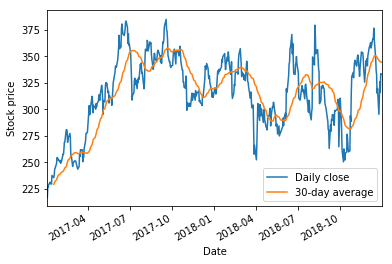

In [23]:
df['Close'].plot(label='Daily close')
df['Close'].rolling(window=30, min_periods=10).mean().plot(label='30-day average')
ylabel('Stock price')
legend(loc='best')
show()

Notice how the x-axis labels automatically say the name of the month, not the ugly "2017-05-01" stuff.

## Trading simulator

A common trading rule says: buy when the 30-day moving average goes above the 180-day moving average (the BUY rule), and sell when it goes below (the SELL rule).

Let us assume you buy 1 share at the closing price the very day the BUY rule triggers, and sell that 1 share the day the SELL rule triggers. (This is cheating a little because we need that day's closing price to compute the averages, but let's gloss over that.) At the end, we want the overall return.

How do we do this?

* Step 1: Compute the daily return ratio, i.e., the ratio of today's closing price to yesterday's closing price.
* Step 2: Create a mask of the days when I hold the share, i.e., the BUY rule has triggered, but the SELL rule has not.
* Step 3: Compute the cumulative return ratio over the days of the mask. This is the product of the return ratios on the days I hold the share.



**Step 1: Daily returns**

We've already seen this.

In [24]:
closes = df['Close']
daily_return_ratio = closes / closes.shift(1)
daily_return_ratio[:10]

Date
2017-01-03         NaN
2017-01-04    1.046085
2017-01-05    0.998943
2017-01-06    1.009967
2017-01-09    1.009912
2017-01-10    0.993903
2017-01-11    0.999391
2017-01-12    0.999391
2017-01-13    1.035542
2017-01-17    0.990873
Name: Close, dtype: float64

**Step 2: Mask of days when we hold share**

How do we do this?

* Compute the 30-day and 180-day moving averages

* Find the days when the 30-day average is greater than the 180-day average.

* On which days do I hold the share?

 Consider the following example:

* The 30-day average is greater than the 180-day average on 5th Jan, 6th Jan, ..., 11th Jan. It falls below the 180-day average on 12th Jan.

* So we buy the share at close of 5th Jan, sell at the close of 12th Jan.

* Hence we _held_ the share (and got its returns) for 6th Jan, 7th Jan, ..., 12th Jan.

* On which days do I hold the share?
    * The days we hold the share is shifted one day from the period the 30-day moving average is higher.

**Step 2: Mask of days when we hold share**

1. Compute the 30-day and 180-day moving averages
2. Find the days when the 30-day average is greater than the 180-day average.
3. The days we hold the share is shifted one day from the periods found in Step 2.

**Step 2.1:** Moving averages

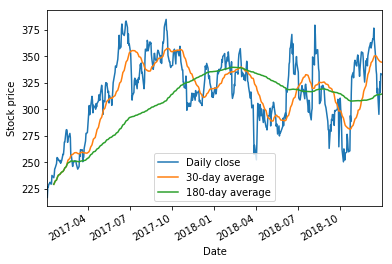

In [25]:
mavg_30 = closes.rolling(window=30, min_periods=10).mean()
mavg_180 = closes.rolling(window=180, min_periods=10).mean()

closes.plot(label='Daily close')
mavg_30.plot(label='30-day average')
mavg_180.plot(label='180-day average')
ylabel('Stock price')
legend(loc='best')
figsize(8,6)

**Step 2.2:** Find the days the 30-day average is greater.

In [26]:
mavg_30_is_greater = (mavg_30 > mavg_180)
mavg_30_is_greater['2017-02-08':'2017-02-22']

Date
2017-02-08    False
2017-02-09    False
2017-02-10    False
2017-02-13    False
2017-02-14    False
2017-02-15     True
2017-02-16     True
2017-02-17     True
2017-02-21     True
2017-02-22     True
Name: Close, dtype: bool

**Step 2.3:** Hold on the days the 30-day moving average is greater, but shifted by 1.

In [27]:
hold_days = mavg_30_is_greater.shift(1)
hold_days['2017-02-08':'2017-02-22']

Date
2017-02-08    False
2017-02-09    False
2017-02-10    False
2017-02-13    False
2017-02-14    False
2017-02-15    False
2017-02-16     True
2017-02-17     True
2017-02-21     True
2017-02-22     True
Name: Close, dtype: object

The story so far:

* We computed daily returns
* We computed the days on which we hold the share

What's left?

* Compute daily returns just on the days we hold the share
    * and take the product of these daily returns

In [28]:
# One little problem
hold_days[0:3]

Date
2017-01-03      NaN
2017-01-04    False
2017-01-05    False
Name: Close, dtype: object

The first date is NaN, because of the shift(). We cannot use hold_days as a mask for daily_return_ratio because the mask must contain only False or True. So let's fix it.

In [29]:
hold_days = hold_days.fillna(False)  # we don't hold shares on the first day
hold_days[0:3]

Date
2017-01-03    False
2017-01-04    False
2017-01-05    False
Name: Close, dtype: bool

Let's see the period when we hold the share

[]

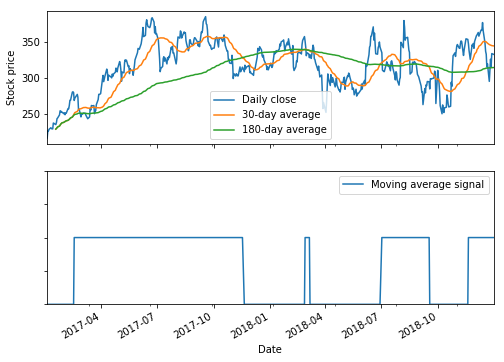

In [30]:
fig, (ax1, ax2) = subplots(nrows=2,
                           ncols=1,
                           sharex=True,
                           figsize=(8, 6))

closes.plot(ax=ax1, label='Daily close')
mavg_30.plot(ax=ax1, label='30-day average')
mavg_180.plot(ax=ax1, label='180-day average')
ax1.legend(loc='best')
ax1.set_ylabel('Stock price')

hold_days.astype(int).plot(ax=ax2, ylim=[0,2], label='Moving average signal')
ax2.legend(loc='best')
ax2.yaxis.set_ticklabels([])

**Finally: Compute cumulative return**

In [31]:
# What are the returns on the days we hold the share?
s = daily_return_ratio[hold_days]
s[:5]

Date
2017-02-16    0.961360
2017-02-17    1.012196
2017-02-21    1.018955
2017-02-22    0.986012
2017-02-23    0.935944
Name: Close, dtype: float64

In [32]:
# Overall return is the product of the returns on each day we held a share.
print 'Overall return ratio =', s.prod()

Overall return ratio = 0.8370277829632601


Is this good? Let's compare to a buy-and-hold strategy, where we buy on the first day and sell on the last.

In [33]:
print 'Return of buy-and-hold =', daily_return_ratio.prod()

Return of buy-and-hold = 1.5337111358497735


Let's see how the cumulative return of the moving average strategy compares to buy-and-hold.

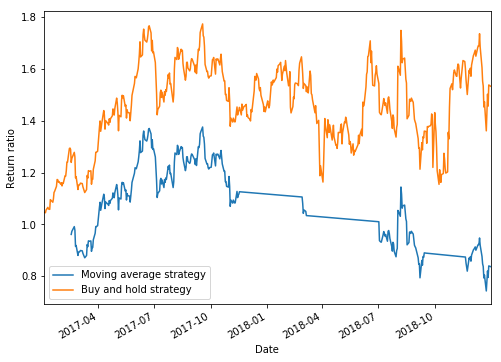

In [34]:
s.cumprod().plot(label='Moving average strategy')
daily_return_ratio.cumprod().plot(label='Buy and hold strategy')
ylabel('Return ratio')
legend(loc='best')
figsize(12,8)

* By the time the moving average strategy sells, the downturn has already hit hard.
* By the time it buys, prices have already gone up quite a bit.